In [1]:
#importing libraries 

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

#importing dataset 

df = pd.read_csv('bigml.csv')
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Plotting Histograms for all columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F225C5438>,
      dtype=object)

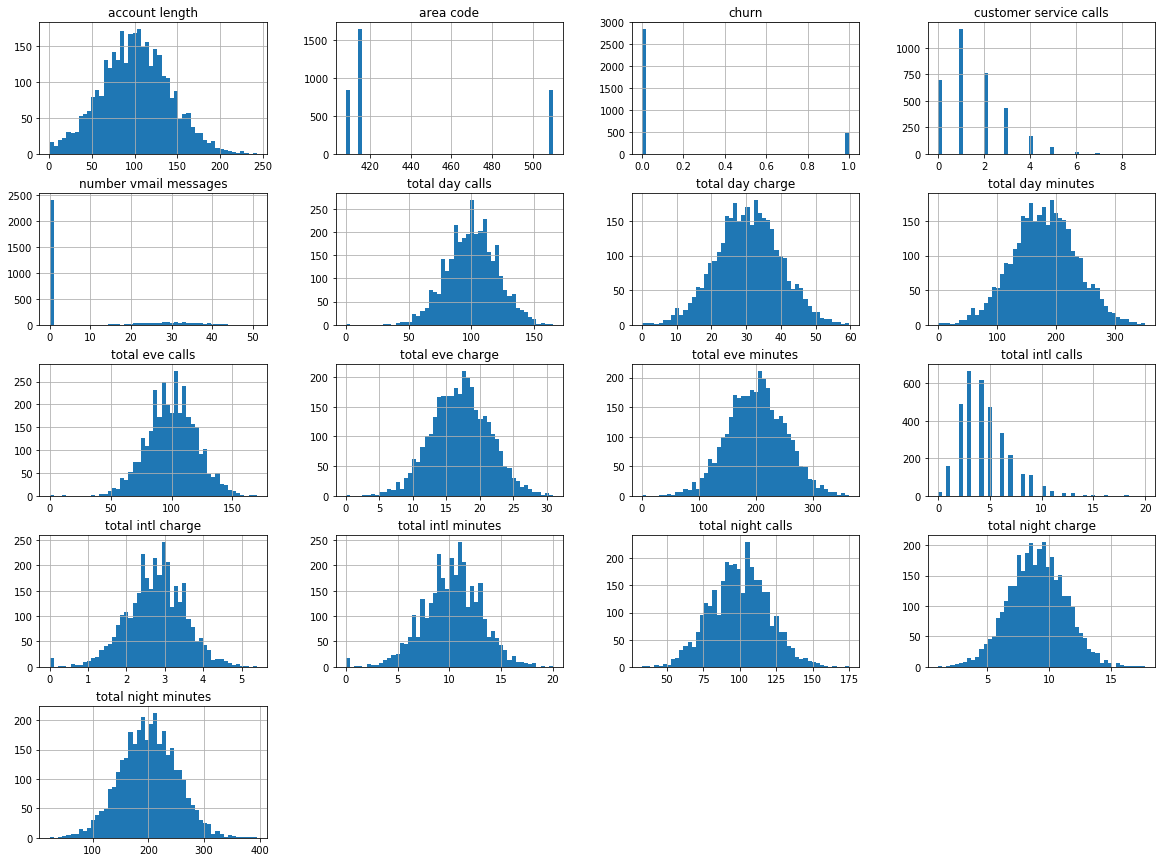

In [6]:
df.hist(bins=50, figsize=(20,15))

#### Finding Relation between all Features and the Label i.e. churn using Barplot 

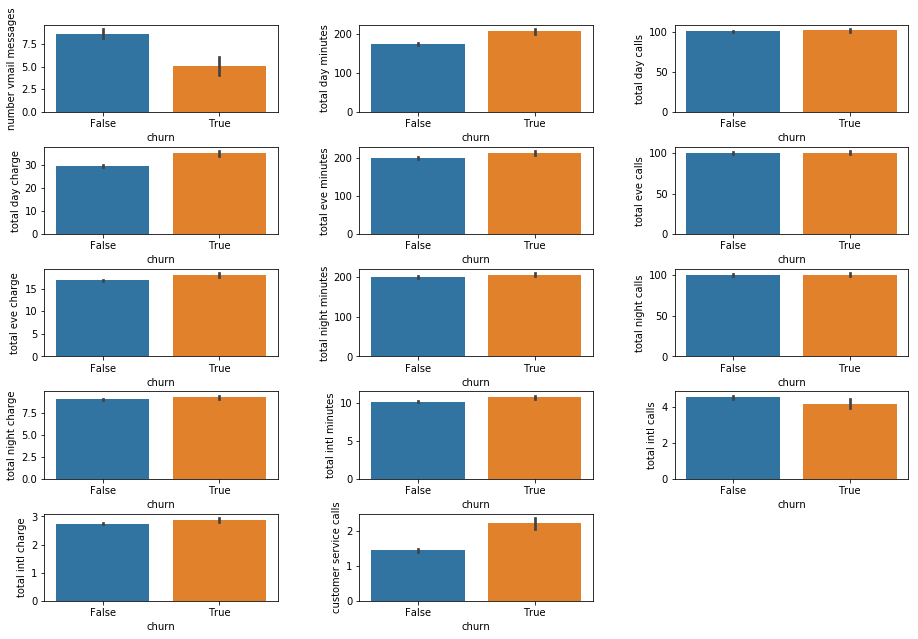

In [39]:

import seaborn as sns

col = ['number vmail messages', 'total day minutes','total day calls','total day charge', 'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls','total night charge', 'total intl minutes','total intl calls','total intl charge','customer service calls']

for i in range(0,14):
    plt.subplot(5,3,i+1)
    sns.barplot(df['churn'],df[col[i]])
    
plt.subplots_adjust(top=2, bottom=0, left=0, right=2, hspace=0.4,
                    wspace=0.35)

##### We can see that the only significant features are those of Customer Service Calls and Voicemail Messages 

### Preprocessing

In [41]:
#Checking for null values 

df.isnull().values.sum()
#No null values found

0

In [56]:
#Feature Scaling continuous values 

def normalize(df):
    for column in df.columns:

            if df[column].dtype not in ['object', 'bool']:
                max_ = df[column].max()
                min_ = df[column].min()
                df[column]= (df[column] - min_) / (max_ - min_)
    return df

df = normalize(df)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,0.524793,0.068627,382-4657,no,yes,0.490196,0.755701,0.666667,0.755701,...,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,False
1,OH,0.438017,0.068627,371-7191,no,yes,0.509804,0.460661,0.745455,0.460597,...,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,False
2,NJ,0.561983,0.068627,358-1921,no,no,0.000000,0.693843,0.690909,0.693830,...,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,False
3,OH,0.342975,0.000000,375-9999,yes,no,0.000000,0.853478,0.430303,0.853454,...,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,False
4,OK,0.305785,0.068627,330-6626,yes,no,0.000000,0.475200,0.684848,0.475184,...,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,False


In [59]:
#Drop Data and Split into Features and Label

df1 = df.drop(['state','area code','phone number'], axis=1)
x = df1.drop(['churn'], axis=1).values
y = df1['churn'].values



In [64]:
#Label Encoding categorical values

from sklearn.preprocessing import LabelEncoder 

x_labelEncoder = LabelEncoder()
x[:,1] = x_labelEncoder.fit_transform(x[:,1])
x[:,2] = x_labelEncoder.fit_transform(x[:,2])

y_labelEncoder = LabelEncoder()
y = y_labelEncoder.fit_transform(y)



### Training and Testing Data  using multiple Models for classification

In [67]:
from sklearn.metrics import accuracy_score #to find accuracy of each model applied so the best can be chosen for the dataset

from sklearn.model_selection import train_test_split 

#Splitting data into test and train sets 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [71]:
#Naive Bayes 

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train) #fitting the model on train data
y_predict = classifier.predict(x_test) #predicting y for test data

#Finding accuracy of model 
print("Accuracy of Naive Bayes is " , accuracy_score(y_predict, y_test))


Accuracy of Naive Bayes is  0.8621103117505995


In [72]:
#Logistic Regression 

from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression()
classifier.fit(x_train, y_train) #fitting the model on train data
y_predict = classifier.predict(x_test) #predicting y for test data

#Finding accuracy of model 
print("Accuracy of Logistic Regression is " , accuracy_score(y_predict, y_test))

Accuracy of Logistic Regression is  0.8705035971223022


In [73]:
#Support Vector Machines 

from sklearn.svm import SVC

classifer = SVC()

classifier.fit(x_train, y_train) #fitting the model on train data
y_predict = classifier.predict(x_test) #predicting y for test data

#Finding accuracy of model 
print("Accuracy of SVM is " , accuracy_score(y_predict, y_test))



Accuracy of SVM is  0.8705035971223022


In [74]:
# Random Forest

classifier=RandomForestClassifier(n_estimators = 25)

classifier.fit(x_train, y_train) #fitting the model on train data
y_predict= classifier.predict(x_test) #predicting y for test data

#Finding accuracy of model
print ("Accuracy of Random Forest is ", accuracy_score(y_predict, y_test))

Accuracy of Random Forest is  0.9580335731414868


### The Random Forest Classifier shows the most accuracy for this dataset. 
